In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt

csv_file = 'star_solver_results.csv'


In [2]:
# READ THE CSV FILE
res_df = pd.read_csv(csv_file)
# drop rows for which the calculation failed
res_df = res_df[res_df['calc_succeeded']==True]

In [3]:
res_df.head(5)

date  time CST    camera         lens description imgId  \
0  7 January 2020  17:51:12  BlackFly  Unknown - R    Rotation     0   
1  7 January 2020  17:52:50  BlackFly  Unknown - R    Rotation    45   
2  7 January 2020  17:53:50  BlackFly  Unknown - R    Rotation    90   
3  7 January 2020  17:57:36  BlackFly  Unknown - R    Rotation   135   
4  7 January 2020  17:57:58  BlackFly  Unknown - R    Rotation   180   

      heading      lat      lon  exposure  ...  roll  number_bright_stars  \
0    0.158655  34.2226 -88.2121  301752.0  ...   NaN                 30.0   
1   45.721100  35.0604 -88.2048  301752.0  ...   NaN                 30.0   
2   89.755600  35.7365 -87.3118  301752.0  ...   NaN                 30.0   
3  134.318000  35.1636 -85.9845  301752.0  ...   NaN                 30.0   
4 -179.220000  34.9740 -85.4873  301752.0  ...   NaN                 30.0   

   true rotation  true latitude  true longitude  distortion_corrected  \
0            0.0        34.7304        -86.5861                 False   
1           45.0        34.7304        -86.5861                 False   
2           90.0        34.7304        -86.5861                 False   
3          135.0        34.7304        -86.5861                 False   
4          180.0        34.7304        -86.5861                 False   

   use_center_px  center_px_0  center_px_1 calc_succeeded  
0          False  1266.830404   762.284078           True  
1          False  1177.228353  1195.819377           True  
2          False  1577.725911   986.596273           True  
3          False  1563.252726  1139.286051           True  
4          False  1262.512919  1213.250895           True  

[5 rows x 24 columns]

In [4]:
# the 26 March entries from the successfully-run star solver 
mar26_df = res_df[res_df['date']=='26 March 2020']
flata_df = mar26_df[mar26_df['description']=='Flat_1']
flatb_df = mar26_df[mar26_df['description']=='Flat_2']
neg5a_df = mar26_df[mar26_df['description']=='neg5el_1']
neg5b_df = mar26_df[mar26_df['description']=='neg5el_2']
pos5a_df = mar26_df[mar26_df['description']=='pos5el_1']
pos5b_df = mar26_df[mar26_df['description']=='pos5el_2']

In [5]:
flata_360 = flata_df['lon'] + 360
flata_360 %= 360
flatb_360 = flatb_df['lon'] + 360
flatb_360 %= 360
neg5a_360 = neg5a_df['lon'] + 360
neg5a_360 %= 360
neg5b_360 = neg5b_df['lon'] + 360
neg5b_360 %= 360
pos5a_360 = pos5a_df['lon'] + 360
pos5a_360 %= 360
pos5b_360 = pos5b_df['lon'] + 360
pos5b_360 %= 360

In [6]:
y_e1 = abs(flata_360 - flata_df['true longitude'])
y_e2 = abs(flata_360 - flata_df['true longitude']-360)
flata_err = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(flatb_360 - flatb_df['true longitude'])
y_e2 = abs(flatb_360 - flatb_df['true longitude']-360)
flatb_err = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(neg5a_360 - neg5a_df['true longitude'])
y_e2 = abs(neg5a_360 - neg5a_df['true longitude']-360)
neg5a_err = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(neg5b_360 - neg5b_df['true longitude'])
y_e2 = abs(neg5b_360 - neg5b_df['true longitude']-360)
neg5b_err = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(pos5a_360 - pos5a_df['true longitude'])
y_e2 = abs(pos5a_360 - pos5a_df['true longitude']-360)
pos5a_err = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

y_e1 = abs(pos5b_360 - pos5b_df['true longitude'])
y_e2 = abs(pos5b_360 - pos5b_df['true longitude']-360)
pos5b_err = np.array([min(y_e1.values[ii], y_e2.values[ii]) for ii in range(y_e1.values.shape[0])])

In [7]:
# X,Y LISTS BEFORE PLOTTING

# make all same length
yarrs = [flata_err, flatb_err, neg5a_err, neg5b_err, pos5a_err, pos5b_err]
ys = [y.shape[0] for y in yarrs]
maxlen = max(ys)
new_ys = []
for yarr in yarrs:
    thislen = yarr.shape[0]
    if thislen < maxlen:
        new_ys.append(np.array([x for x in yarr] + [np.nan for _ in range(maxlen-thislen)]))
    else:
        new_ys.append(yarr)

y_flata = new_ys[0]
y_flatb = new_ys[1]
y_neg5a = new_ys[2]
y_neg5b = new_ys[3]
y_pos5a = new_ys[4]
y_pos5b = new_ys[5]
xx = np.array([i for i in range(maxlen)])
xx = np.reshape(xx,(maxlen,1))

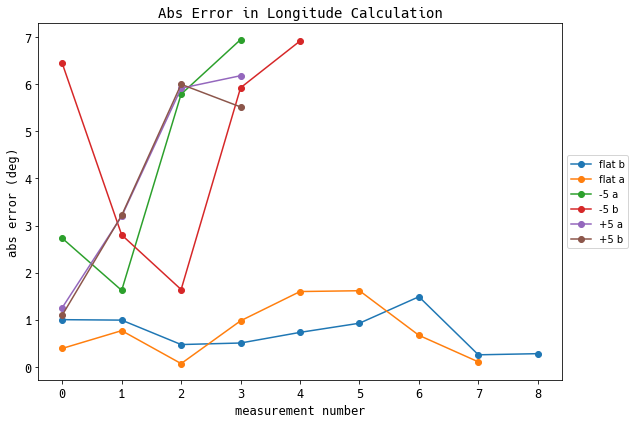

In [8]:
# PLOT CALCULATION ERROR
fig=plt.figure(figsize=(8, 6))
ax=fig.add_subplot(111)
ax.plot(xx, y_flata, '-o', label='flat b')
ax.plot(xx, y_flatb, '-o', label='flat a')
ax.plot(xx, y_neg5a, '-o', label='-5 a')
ax.plot(xx, y_neg5b, '-o', label='-5 b')
ax.plot(xx, y_pos5a, '-o', label='+5 a')
ax.plot(xx, y_pos5b, '-o', label='+5 b')
########################################3
# Shrink current axis by 20%
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
# Put a legend to the right of the current axis
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#########################################

ax.set_xlabel('measurement number', fontsize=12, fontname='hack')
#ax.set_xlim([-135,180])
ax.set_ylabel('abs error (deg)', fontsize=12, fontname='hack')
#ax.set_ylim([0,6])
#plt.legend(loc='upper center')
#plt.show()
plt.xticks(fontsize=12, fontname='hack', rotation=0)
plt.yticks(fontsize=12, fontname='hack', rotation=0)
plt.title('Abs Error in Longitude Calculation', fontsize=14, fontname='hack')
plt.tight_layout()
plt.savefig('./longitude_errors.png', bbox_inches='tight', pad_inches=0.1)
